# Muestreo estraticado en python

In [34]:
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

econdata = pd.read_csv('eco.csv')

-----

## 3) Muestro estratificado

In [35]:
econdata = econdata.replace(['Cuautémoc'],['Cuauhtémoc'])

In [65]:
econdata['estratificado'] = econdata['delegacion'] + ',' + econdata['tipo']
econdata

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id,estratificado
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez,"Cuauhtémoc,Mercado"
1,1,"19.4346139576,-99.1413808393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_008_01,Cuauhtémoc,A,Museo,Museo Nacional de Arquitectura Palacio de Bell...,"Cuauhtémoc,Museo"
2,2,"19.4340695945,-99.1306348409","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_002_12,Cuauhtémoc,A,Museo,Santa Teresa,"Cuauhtémoc,Museo"
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena,"Venustiano Carranza,Hotel"
4,4,"19.42358238,-99.12451093","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_115_12,Venustiano Carranza,B,Hotel,real,"Venustiano Carranza,Hotel"
...,...,...,...,...,...,...,...,...,...
225,225,"19.43094655,-99.12455418","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_027_04,Venustiano Carranza,B,Hotel,Gran Veracruz,"Venustiano Carranza,Hotel"
226,226,"19.4416748524,-99.1365878489","{""type"": ""Polygon"", ""coordinates"": [[[-99.1370...",004_052_01,Cuauhtémoc,B,Mercado,De Muebles,"Cuauhtémoc,Mercado"
227,227,"19.4307201342,-99.1491381087","{""type"": ""Polygon"", ""coordinates"": [[[-99.1498...",002_052_02,Cuauhtémoc,B,Mercado,Artesanías Ciudadela,"Cuauhtémoc,Mercado"
228,228,"19.4406567734,-99.1394531646","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_069_01,Cuauhtémoc,B,Museo,Tequila y Mescal,"Cuauhtémoc,Museo"


In [43]:
(
    econdata['estratificado']
    .value_counts()/len(econdata)
).sort_values(ascending=False)

Cuauhtémoc,Hotel               0.643478
Cuauhtémoc,Museo               0.156522
Venustiano Carranza,Hotel      0.078261
Cuauhtémoc,Mercado             0.073913
Venustiano Carranza,Mercado    0.047826
Name: estratificado, dtype: float64

Nuestros datos dicen que la proporcion es la siguiente

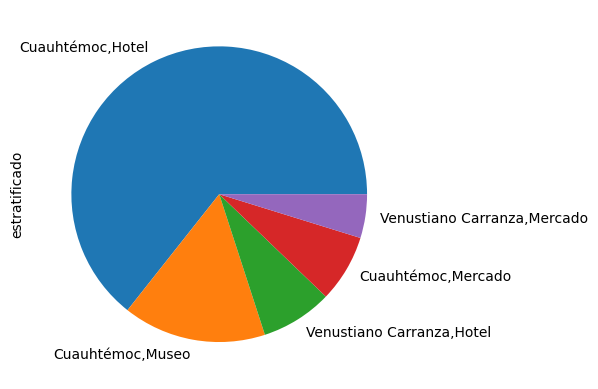

In [51]:
(
    econdata['estratificado']
    .value_counts()/len(econdata)
).plot(kind='pie')

plt.show()

In [79]:
#Explicación de la función data_estratificada
#Le agreugue el parametro tamaño de muestra para 
#hacer mas entendible la función

#Definimos la función con sus variables
def data_estratificad(econdata,nombres_columnas_estrat,
                      valores_estrat, prop_estrat, 
                      tamano_muestra,random_state=None):
    '''Función que dado un dataFrame toma una muestra estratificada
    
    Argumentos:
    econdata {DataFrame}    -- DataFrame del cual tomaremos la muestra
    nombres_columnas {list} -- Valores a partir de los cuales se va a estratificar el DataFrame
    valores_estrat {list}   -- Valores del porcentaje de la muestra que tomara cada nombre de la lista anterior
    tamano_muestra {int}    -- Cantidad de datos que tendra la muestra
    random_state {int}      -- Función que nos permite elegir la semilla de los números pseudo-aleatorios
    '''
    
    'Creamos un DataFrame vacio con las mismas columnas donde guardaremos los datos'
    df_estrat = pd.DataFrame(columns= econdata.columns)
    
    'Contador auxiliar para ir pasando la lista'
    pos = -1
    
    'Ciclo for el cual va cambiando los valores donde seleccionamos la cantidad de datos por cada nombre'
    'Función range(len(valores_estrat)) nos indica que iremos desde 0 hasta la cantidad de entradas que tenga la lista valores_estrat'
    'esto para recorrer toda la lista'
    for i in range(len(valores_estrat)):
        
        'sumamos 1 a pos'
        pos +=1
        
        'Ciclo if el cual nos ayudara a saber la cantidad de datos que vamos a extraer de cada clasificador'
        'si posicion es igual a ultima:'
        if pos == len(valores_estrat)-1:
            'la cantidad de valores que obtendremos sera el tamaño de la muestra menos los que ya tenemos'
            ratio_len = tamano_muestra - len(df_estrat)
            'En caso de no sea la ultima posición'
            
        else:
            'la cantidad de valores que tendremos para este clasificador se obtendra de la siguente forma'
            'multiplicamos el tamaño de la muestra por la proporcion que corresponde a ese clasificador'
            'como el valor puede no ser entero, lo convertimos en entero'
            ratio_len = int(tamano_muestra*prop_estrat[i])
        
        'en el DataFrame df_filtrado filtramos los valores de la columna que incluyan al clasificador'
        df_filtrado = econdata[econdata[nombres_columnas_estrat]==valores_estrat[i]]
        
        'obtenemos una muestra del tamano obtenido en ratio_len y la agregamos al dataFrame df_temp'
        df_temp = df_filtrado.sample(replace=True, n=ratio_len, random_state=random_state)
        
        'Concatenamos la información al DataFrame df_estrat, de tal forma que se guardan los valores de todos los clasificadores'
        df_estrat = pd.concat([df_estrat,df_temp])
    return df_estrat

In [76]:
len(econdata)

230

In [86]:
valores_estrat = ['Cuauhtémoc,Hotel','Cuauhtémoc,Museo','Venustiano Carranza,Hotel',
                  'Cuauhtémoc,Mercado','Venustiano Carranza,Mercado']
prop_estrat =[0.5, 0.2, 0.1, 0.1, 0.1]

df_estrat = data_estratificad(econdata,'estratificado',40,valores_estrat,
                              prop_estrat,random_state=42)

In [87]:
(df_estrat['estratificado'].value_counts()/len(df_estrat)).sort_values(ascending=False)

Cuauhtémoc,Hotel               0.5
Cuauhtémoc,Museo               0.2
Venustiano Carranza,Hotel      0.1
Cuauhtémoc,Mercado             0.1
Venustiano Carranza,Mercado    0.1
Name: estratificado, dtype: float64

In [88]:
df_estrat.shape

(40, 9)